In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Bank Churn Rate

EDA About user bank churn


## Data Understanding


In [3]:
df = pd.read_csv('Customer-Churn-Records.csv')


In [4]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [6]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [7]:
df.shape


(10000, 18)

In [8]:
df.dtypes


RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [9]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

# Data Preperation


In [10]:
df = df.drop(['RowNumber', 'Tenure'], axis=1)


In [11]:
df = df.rename(columns={'CustomerId': 'customer_id', 'Surname': 'surname', 'CreditScore': 'credit_score', 'Geography': 'geography',
                        'Gender': 'gender', 'Age': 'age', 'Balance': 'balance', 'NumOfProducts': 'num_products', 'HasCrCard': 'has_cc',
                        'IsActiveMember': 'is_active', 'EstimatedSalary': 'estimated_salary', 'Exited': 'exited', 'Complain': 'complain',
                        'Satisfaction Score': 'satisfaction_score', 'Card Type': 'card_type', 'Point Earned': 'points_earned'})


In [29]:
df.columns

Index(['customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age',
       'balance', 'num_products', 'has_cc', 'is_active', 'estimated_salary',
       'exited', 'complain', 'satisfaction_score', 'card_type',
       'points_earned'],
      dtype='object')

In [12]:
df.head()


,customer_id,surname,credit_score,geography,gender,age,balance,num_products,has_cc,is_active,estimated_salary,exited,complain,satisfaction_score,card_type,points_earned
0,15634602,Hargrave,619,France,Female,42,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [13]:
df.geography.unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
na_count = df.isna().sum().sum()
na_count


0

In [15]:
df.card_type.unique()


array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [16]:
df['card_type'] = df['card_type'].astype('category')


In [17]:
df.duplicated().sum()


0

# Feature Understanding


Text(0, 0.5, 'Count')

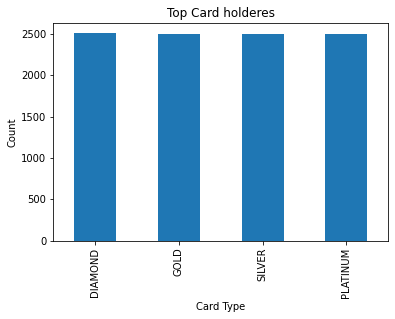

In [18]:
ax = df['card_type'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top Card holderes')

ax.set_xlabel('Card Type')
ax.set_ylabel('Count')


Text(0, 0.5, 'Count')

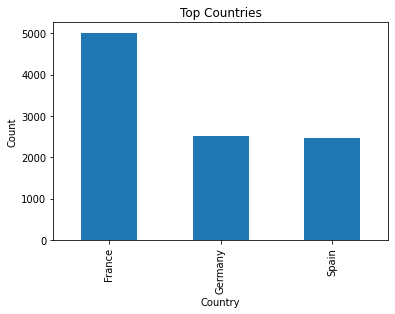

In [19]:
ax = df['geography'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Count')


Text(0, 0.5, 'Count')

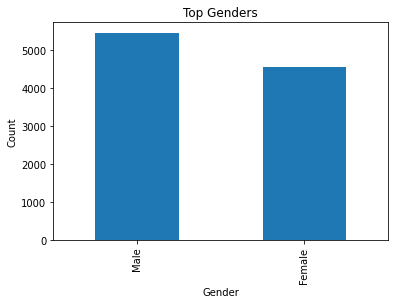

In [20]:
ax = df['gender'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top Genders')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')


[]

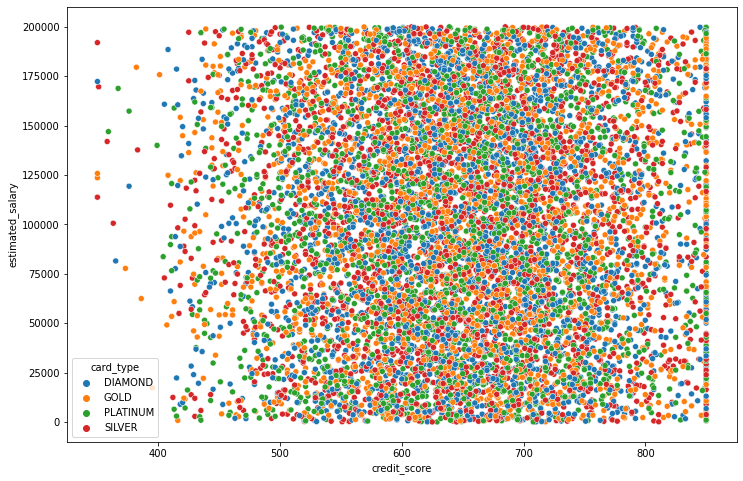

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='credit_score', y='estimated_salary',
                hue='card_type', data=df)
plt.plot()


In [31]:
columns_to_corr = ['credit_score', 'geography', 'gender', 'age',
       'balance', 'num_products', 'has_cc', 'is_active', 'estimated_salary',
       'exited', 'complain', 'satisfaction_score', 'card_type',
       'points_earned']

col_select = df[columns_to_corr]
corr_matrix = col_select.corr()


C:\Users\Joe's PC\AppData\Local\Temp\ipykernel_2584\3345186912.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = col_select.corr()


<AxesSubplot:>

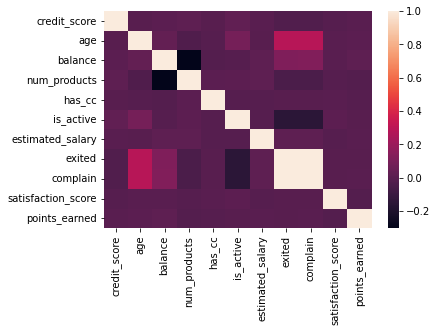

In [32]:
sns.heatmap(corr_matrix)